# Run ADAM 

The model ADAM (Annual Danish Aggregate Model)is a model of the Danish
economy maintained and developed by Danmarks Statistik.  A Link to the model: https://www.dst.dk/pubomtale/18836. It has 4624 equations 

Danmarks Statistik has kindly provided the model version JUN17X and an associated databank for this demo. 

The model and databank is not the current model and forecast, but serves as an example. 

This is a basic demo. However you can use all the features of ModelFlow to manipulate the model.  

The notebook runs when loaded. To run a cell press Shift-enter, 

# Import ModelFlow and Pandas

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import pandas as pd
from ipywidgets import interact,Dropdown,Checkbox


from IPython.display import display    # , clear_output

from modelclass import model 
import modeljupyter as mj
model.modelflow_auto()

# load  model and databank
The model and baseline has been created in [ADAM - create the model and run.ipynb](ADAM%20-%20create%20the%20model%20and%20run.ipynb)

In [57]:
turbo=0
madam,basedf0 = model.modelload('adam/jul17x.pcim',run=1,ljit=turbo,stringjit=0)

# Define a interface to experiments

The next cell defines interactive widget. 

You can add additional variables using by adding extra entries to the slidedef dictionary 

In [58]:
# ADAM Variable descriptions 
vtrans = {'ENL'  :'Balance of Payment, surplus','UL':'Unemployment','FY':'Real GDP',
         'TFN_O' :'Public surplus','TFN_OY':'Public surplus, Percent of GDP'}

# Define some input fields 
slidedef = {'Value added tax rate':                {'var':'TG','value':-0.05,'min':-0.1, 'max':0.1,'op':'+'},
            'Extra labour supply, 1000 ':          {'var':'UQ','value':10,'min':-8,    'max':8,   'op':'+','step':1},
            }
# Now call the input widget to display the input
input = madam.inputwidget(2018,2030,slidedef=slidedef
                   ,showout=True,varpat='FY ENL UL TFN_O TFN_OY',trans=vtrans)

# Attributions to the results from changed variables

In [59]:
display(madam.get_att_gui(desdic=vtrans))

Total dekomp took       :         6.076 Seconds
TOTDEKOMP made


interactive(children=(Dropdown(description='Variable', index=1469, options=('AFCO', 'AFCP', 'AFE', 'AFIBH', 'A…

None

# Attributions to an equation from its input. 
You can decide how many levels back in the dependency tree you want to calculate the attributions 

In [60]:
@interact(Threshold = (0.0,10.0,1.))
def explain(Variable  = Dropdown(options = sorted(madam.endogene),value='FY'),
            Pct       = Checkbox(description='Percent growth',value=False),
            Periode   = Dropdown(options = madam.current_per,value=2022),
            Threshold = 0.0):
    mj.get_frml_latex(madam,Variable)
    madam.dekomp_plot(Variable,pct=Pct,threshold=Threshold)
    madam.dekomp_plot_per(Variable,pct=Pct,threshold=Threshold,per=Periode,sort=True)


interactive(children=(Dropdown(description='Variable', index=1469, options=('AFCO', 'AFCP', 'AFE', 'AFIBH', 'A…

# Attribution going back in the dependency tree
You might have to zoom in order to look at the actual numbers.
Also the result can be inspected in the graph/ folder.

Pointing at a variable name will display the variable label.

In [67]:
madam.modeldash('UL',jupyter=1,port = 5005,all = 1)

Still worlking on the layout of this
Dash app running on http://127.0.0.1:5005/


In [62]:
wnames = sorted([name for name in madam.endogene if name+'W' in madam.endogene])
#wnames

In [63]:
for n in wnames[-4:]:
    frml = madam.allvar[n]['frml']
    wfrml = madam.allvar[n+'W']['frml']
    print(f'\n{n}\n{frml}\n{wfrml}')



YAS
FRML <_KJ_D,J,EXO> YAS              =( ( YW-YWN_E+TYS
                                           +(1-BSYPTYPR_BF)*(TYPCR_BF+TYPIR_BF) + TYPCR_DMP
                                           +(1-BSYPTYPCR_SP)*TYPCR_SP + (1-BSYPTYPCR_ATP)*TYPCR_ATP
                                           -SYAUD-TPCR_ATP/(1-TSYA)-SAQP-SAQO-(TPCR_BF+TPCO1_BF)/(1-TSYA)-TPT_O)*KYAS + JYAS)*(1-DYAS)+ZYAS*DYAS$
FRML <_GJ_D,J,EXO> YASW             =( KYAS*(YW-YWN_E-SYAUD-TPCR_ATP/(1-TSYA)-SAQP-SAQO-(TPCR_BF+TPCO1_BF)/(1-TSYA)-TPT_O+(TYM-TYMR-TYMLF)+TYRRS) + JYASW)*(1-DYASW)+ZYASW*DYASW$

YS
FRML <_DJ_D,J,EXO> YS               =( YSP+YRPHS+TIPPPS-YLWS-YL3S+YSRS + JYS)*(1-DYS)+ZYS*DYS$
FRML <_KJ_D,J,EXO> YSW              =( KKYS*KYSW*(YSPW+1.003*(YRPHS+TIPPPS)-.969*YLWS-.951*YL3S+.951*YSRS ) + JYSW)*(1-DYSW)+ZYSW*DYSW$

YSP
FRML <_DJ_D,J,EXO> YSP              =( YAS+YRPSS-TOPS-SYAS-YSPPS+YSPRS + JYSP)*(1-DYSP)+ZYSP*DYSP$
FRML <_KJ_D,J,EXO> YSPW             =( KKYSP*KYSPW*(.969*YASW+.421*YASD+.000*YASE+.000

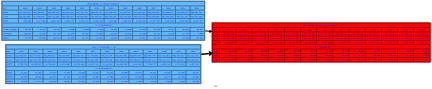

In [64]:
madam.draw('fm',filter=30,up=1,down=0,attshow = 1,browser=1)

In [65]:
madam.att_dic.keys()


dict_keys(['FMS', 'FMV', 'FM'])